# Classification using Convolutional Neural Networks.

## Table of Contents
- [Theory](#theory)
    - [What is convolution?](#conv)
    - [Some examples](#conv_ex)
    - [Mathematical formulation](#conv_math)
    - [CNNs](#cnns)
    - [Layers](#conv_layers)
- [Torch Specific Layers](#torch_conv)
- [Image Classification](#im_cnn)
- [Music Genre classification](#other_cnn)

## **Theory** <a class="anchor" id="theory"></a>

### **What is convolution?** <a class="anchor" id="conv"></a>

### **Some examples** <a class="anchor" id="conv_ex"></a>

### **Mathematical formulation** <a class="anchor" id="conv_math"></a>

### **CNNs** <a class="anchor" id="cnns"></a>

![CNN basic architecture](imgs/cnn.PNG "CNN basic architecture") Source: [link](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*Vior6yy6_qN5rBv5Os0kGA.png)

### **Layers** <a class="anchor" id="conv_layers"></a>

## **Torch Specific Layers** <a class="anchor" id="torch_conv"></a>

## **Image Classification** <a class="anchor" id="im_cnn"></a>

### GTSRB dataset

The GTSRB (German Traffic Sign Recognition Benchmark) consists of images of traffic signs commonly encountered on roads in Germany. he dataset comprises 43 different classes, images in the dataset vary in terms of lighting conditions, weather, and viewpoints, and may contain variations in aspect ratio.

In [463]:
import torchvision
import torchvision.transforms as transforms

h, w = 32, 32

data_transform = data_transforms = transforms.Compose([
    transforms.Resize((h, w)),
    transforms.ToTensor(),
])

gtsrb_train = torchvision.datasets.GTSRB(root="./data", split="train", download=True, transform=data_transform)
gtsrb_test = torchvision.datasets.GTSRB(root="./data", split="test", download=True, transform=data_transform)

Images are already normalized $[0, 1]$. Original images have a wide range of resolutions, from $15 \times 15$ to $250 \times 250$ pixels. 

In [464]:
print("Train images: ", len(gtsrb_train), "Test images: ", len(gtsrb_test))

Train images:  26640 Test images:  12630


In [128]:
label_map = {
    0: 'Limitează la 20 km/h',
    1: 'Limitează la 30 km/h',
    2: 'Limitează la 50 km/h',
    3: 'Limitează la 60 km/h',
    4: 'Limitează la 70 km/h',
    5: 'Limitează la 80 km/h',
    6: 'Limitează la 80 km/h (fără restricție)',
    7: 'Limitează la 100 km/h',
    8: 'Limitează la 120 km/h',
    9: 'Interzis depășirea (în general)',
    10: 'Interzis depășirea camioanelor',
    11: 'Prioritate la trecerea pietonilor',
    12: 'Prioritate la intersecții (în general)',
    13: 'Cedează trecerea',
    14: 'Stop',
    15: 'Interzis accesul (în general)',
    16: 'Interzis accesul camioanelor',
    17: 'Circulație doar într-o direcție',
    18: 'Atenție (în general)',
    19: 'Atenție - Viraj la stânga',
    20: 'Atenție - Viraj la dreapta',
    21: 'Atenție - Drum sinuos',
    22: 'Atenție - Diferență de nivel',
    23: 'Atenție - Suprafața alunecoasă',
    24: 'Atenție - Îngustare de drum',
    25: 'Atenție - Lucrări pe drum',
    26: 'Atenție - Semafor defect',
    27: 'Atenție - Trecere de pietoni',
    28: 'Atenție - Copii',
    29: 'Atenție - Bicicliști',
    30: 'Atenție - Zăpadă sau gheață',
    31: 'Atenție - Animale sălbatice',
    32: 'Sfârșitul restricțiilor (în general)',
    33: 'Viraj la dreapta',
    34: 'Viraj la stânga',
    35: 'Mergi drept',
    36: 'Mergi drept sau la dreapta',
    37: 'Mergi drept sau la stânga',
    38: 'Viraj la dreapta în jos',
    39: 'Viraj la stânga în jos',
    40: 'Sens giratoriu',
    41: 'Sfârșitul interdicției de depășire (în general)',
    42: 'Sfârșitul interdicției de depășire a camioanelor'
}

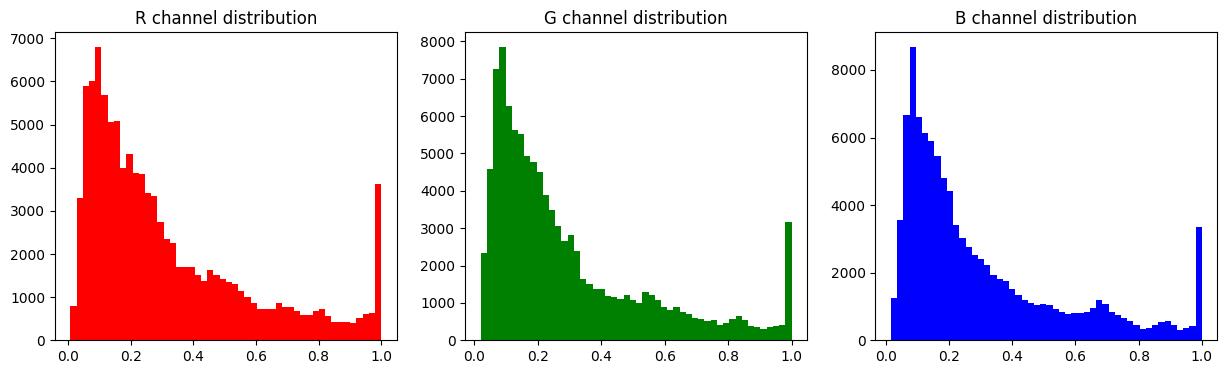

In [466]:
import numpy as np
import matplotlib.pyplot as plt

# Collect some data
data_rgb = [[], [], []]
num_samples = 100
for i in range(num_samples):
    im, target = gtsrb_test[i]

    data_rgb[0].append(im[0].numpy().flatten())
    data_rgb[1].append(im[1].numpy().flatten())
    data_rgb[2].append(im[2].numpy().flatten())

data_rgb[0] = np.array(data_rgb[0]).flatten()
data_rgb[1] = np.array(data_rgb[1]).flatten()
data_rgb[2] = np.array(data_rgb[2]).flatten()

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
_ = plt.hist(data_rgb[0], color="red", bins=50)
_ = plt.title("R channel distribution")
plt.subplot(1, 3, 2)
_ = plt.hist(data_rgb[1], color="green", bins=50)
_ = plt.title("G channel distribution")
plt.subplot(1, 3, 3)
_ = plt.hist(data_rgb[2], color="blue", bins=50)
_ = plt.title("B channel distribution")

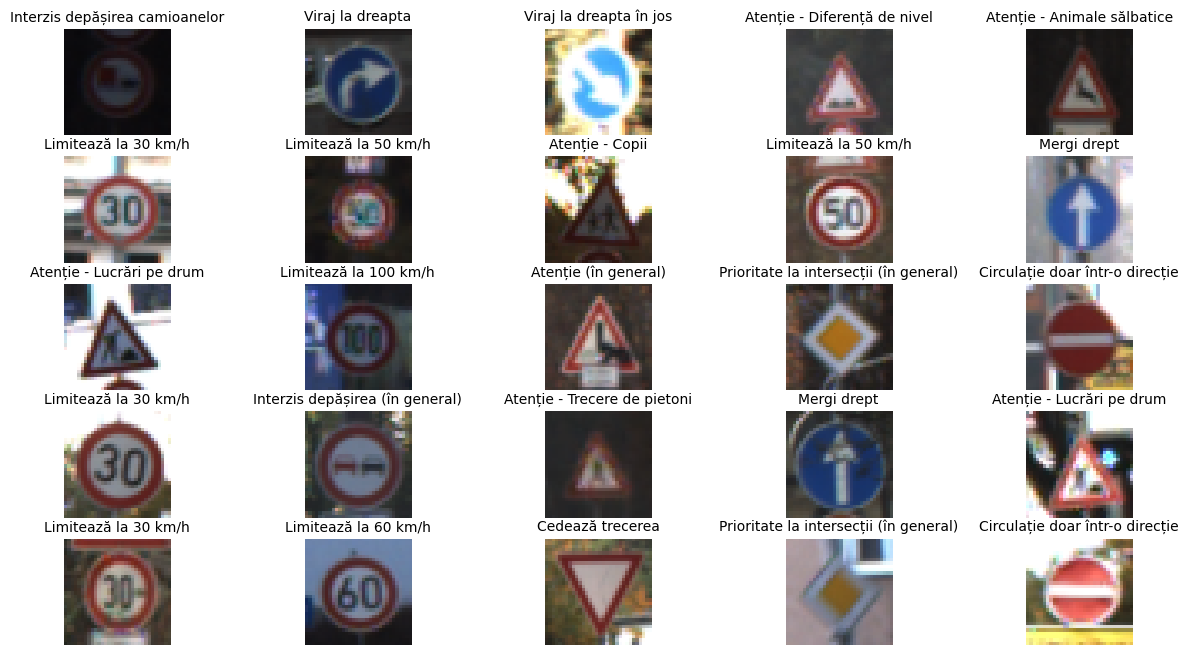

In [470]:
import importlib
import utils
importlib.reload(utils)
from utils import plot_random_images

plot_random_images(gtsrb_test, label_map, rows=5, columns=5)

#### <ins>Exercise</ins>: Check Class Distribution

In [471]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: extract all targets from train/test datasets and get all unique values and their corresponding counts
test_targets = [y for x, y in gtsrb_test._samples]
train_targets = [y for x, y in gtsrb_train._samples]

unique_train, counts_train = np.unique(train_targets, return_counts=True)
unique_test, counts_test = np.unique(test_targets, return_counts=True)

assert len(unique_train) == len(unique_test), ValueError("Missing targets.")
# ***************************************************

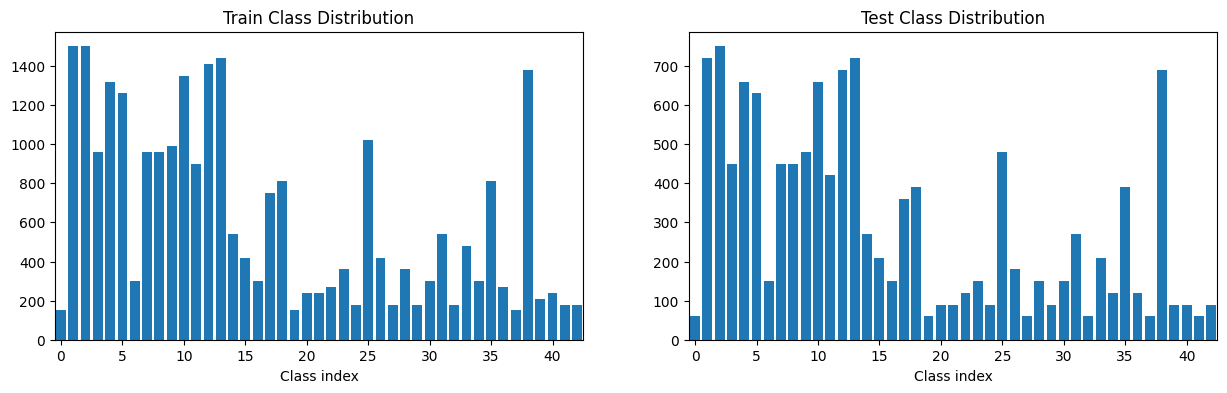

In [472]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: bar plot/histogram to visualize the distribution of classes
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.title("Train Class Distribution")
plt.bar(unique_train, counts_train)
plt.xlim([min(unique_train) - 0.5, max(unique_train) + 0.5])
plt.xlabel("Class index")
plt.subplot(1, 2, 2)
plt.title("Test Class Distribution")
plt.bar(unique_test, counts_test)
plt.xlim([min(unique_test) - 0.5, max(unique_test) + 0.5])
_ = plt.xlabel("Class index")
# ***************************************************

Quite imbalanced dataset, but train and test distributions seem roughly the same.

### Define CNN model class

In [473]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, in_ch, n_classes, *args, **kwargs):
        super(SimpleCNN, self).__init__(*args, **kwargs)

        self.conv_sequence = nn.Sequential(
            nn.Conv2d(in_ch, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
        )

        self.global_pool = nn.AdaptiveMaxPool2d(1)

        self.dense_sequence = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, n_classes)
        )
    
    def forward(self, x):
        z1 = self.conv_sequence(x)
        z2 = self.global_pool(z1).view(z1.size(0), -1)
        z3 = self.dense_sequence(z2)

        return z3

#### <ins>Exercise</ins>: write a generic CNN class for classification tasks, given the following requirements:
- We can create a network with an arbitrary number of Conv2d layers
- The choice of pooling operators, after each Conv2d, is controlled by the user
- We can create a network with an arbitrary number of Linear layers, that succeed the convolutional sequence

In [474]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: write a CNN class, given the above requirements

# ***************************************************

In [475]:
from torchsummary import summary

model = SimpleCNN(in_ch=3, n_classes=43)

summary(model, (3, 64, 64), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             448
              ReLU-2           [-1, 16, 64, 64]               0
            Conv2d-3           [-1, 32, 64, 64]           4,640
              ReLU-4           [-1, 32, 64, 64]               0
         MaxPool2d-5           [-1, 32, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          18,496
              ReLU-7           [-1, 64, 32, 32]               0
         MaxPool2d-8           [-1, 64, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]          73,856
             ReLU-10          [-1, 128, 16, 16]               0
AdaptiveMaxPool2d-11            [-1, 128, 1, 1]               0
           Linear-12                   [-1, 64]           8,256
             ReLU-13                   [-1, 64]               0
           Linear-14                   

**Number of total parameters doesn't change with the input height/width! Why?**

### Training

In [476]:
batch_size = 128
epochs = 10
lr = 1e-3
print_frequency = 1

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

In [477]:
from torch.utils.data import DataLoader

gtsrb_train_loader = DataLoader(gtsrb_train, batch_size=batch_size, shuffle=True)
gtsrb_test_loader = DataLoader(gtsrb_test, batch_size=batch_size, shuffle=False)

In [478]:
print(f"N.o. train batches: {len(gtsrb_train_loader)}. N.o. test batches: {len(gtsrb_test_loader)}")

N.o. train batches: 209. N.o. test batches: 99


In [365]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f"Using {device}.")

Using cuda.


Pre-load train/test loader, s.t. we don't have to do it every epoch.

In [480]:
import os
from tqdm import tqdm
import torch_utils
importlib.reload(torch_utils)

# Define root folder and file_name for saving
folder_path = "models/gtsrb"
file_name = "model.pth"

_ torch_utils.train_loop(
    model, 
    train_loader=gtsrb_train_loader, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs, 
    test_loader=gtsrb_test_loader, 
    device=device, 
    folder_path=folder_path, 
    file_name=file_name,
)

100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:08<00:00, 11.81it/s]


Epoch 1/10: train_loss=0.7769719958305359 train_acc=0.7986861861861861 test_loss=1.6634996166132918 test_acc=0.6401425178147269


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:09<00:00, 10.96it/s]


Epoch 2/10: train_loss=0.4393681679901324 train_acc=0.8692192192192192 test_loss=1.4179306560092502 test_acc=0.6828186856690419


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:11<00:00,  8.62it/s]


Epoch 3/10: train_loss=0.3529101459033181 train_acc=0.8938438438438439 test_loss=1.499221469416763 test_acc=0.6997624703087886


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:08<00:00, 11.15it/s]


Epoch 4/10: train_loss=0.2713496354564525 train_acc=0.9171921921921922 test_loss=1.2649207837653882 test_acc=0.751464766429137


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 12.50it/s]


Epoch 5/10: train_loss=0.21773743725707087 train_acc=0.9350975975975976 test_loss=1.5491450705913583 test_acc=0.731353919239905


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:09<00:00, 10.45it/s]


Epoch 6/10: train_loss=0.20679447279449856 train_acc=0.9367867867867868 test_loss=1.4143235207808138 test_acc=0.7422011084718924


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:08<00:00, 11.95it/s]


Epoch 7/10: train_loss=0.15042061192923756 train_acc=0.9527777777777777 test_loss=1.4214984473555978 test_acc=0.7541567695961995


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:08<00:00, 11.50it/s]


Epoch 8/10: train_loss=0.1396908359156485 train_acc=0.9561561561561561 test_loss=1.2261146602004465 test_acc=0.8002375296912114


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:08<00:00, 11.19it/s]


Epoch 9/10: train_loss=0.09505906285780469 train_acc=0.9710585585585586 test_loss=1.4239358540737268 test_acc=0.7832145684877276


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 12.44it/s]

Epoch 10/10: train_loss=0.12160135843037989 train_acc=0.962987987987988 test_loss=1.2665875885221693 test_acc=0.7841646872525733


([0.7769719958305359,
  0.4393681679901324,
  0.3529101459033181,
  0.2713496354564525,
  0.21773743725707087,
  0.20679447279449856,
  0.15042061192923756,
  0.1396908359156485,
  0.09505906285780469,
  0.12160135843037989],
 [1.6634996166132918,
  1.4179306560092502,
  1.499221469416763,
  1.2649207837653882,
  1.5491450705913583,
  1.4143235207808138,
  1.4214984473555978,
  1.2261146602004465,
  1.4239358540737268,
  1.2665875885221693])

#### Inspecting Confusion Matrix

In [481]:
import torch_utils
importlib.reload(torch_utils)

# load best model
model.load_state_dict(
    torch.load(
        os.path.join(folder_path, file_name)
    )["state_dict"]
)
model.to(device)

# get test predictions
y_train, y_train_pred = torch_utils.get_prediction_targets(model, gtsrb_train_loader, device=device)
y_test, y_test_pred = torch_utils.get_prediction_targets(model, gtsrb_test_loader, device=device)

100%|███████████████████████████████████████████████████████████████████████████| 99/99 [01:41<00:00,  1.03s/it]


In [482]:
assert y_train.shape == y_train_pred.shape
assert y_test.shape == y_test_pred.shape

In [483]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, y_train_pred, normalize="true")
test_cm = confusion_matrix(y_test, y_test_pred, normalize="true")

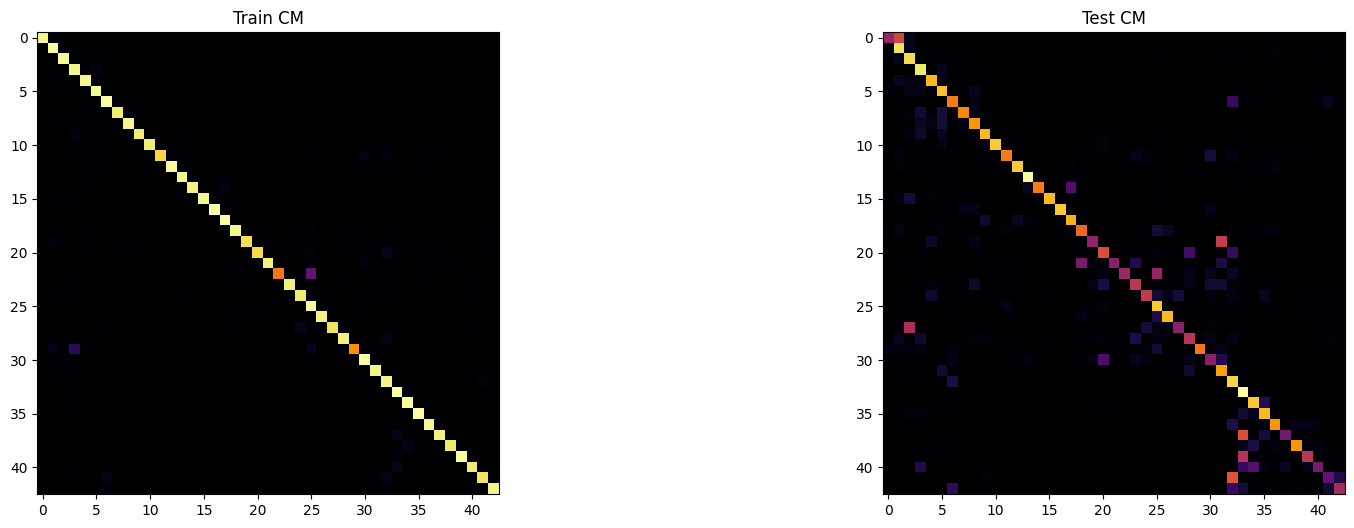

In [484]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.title("Train CM")
plt.imshow(train_cm, cmap="inferno")
plt.subplot(1, 2, 2)
plt.title("Test CM")
_ = plt.imshow(test_cm, cmap="inferno")

### Visualizing Region Importance

In [485]:
try:
    import pytorch_grad_cam 
except:
    !pip install grad-cam

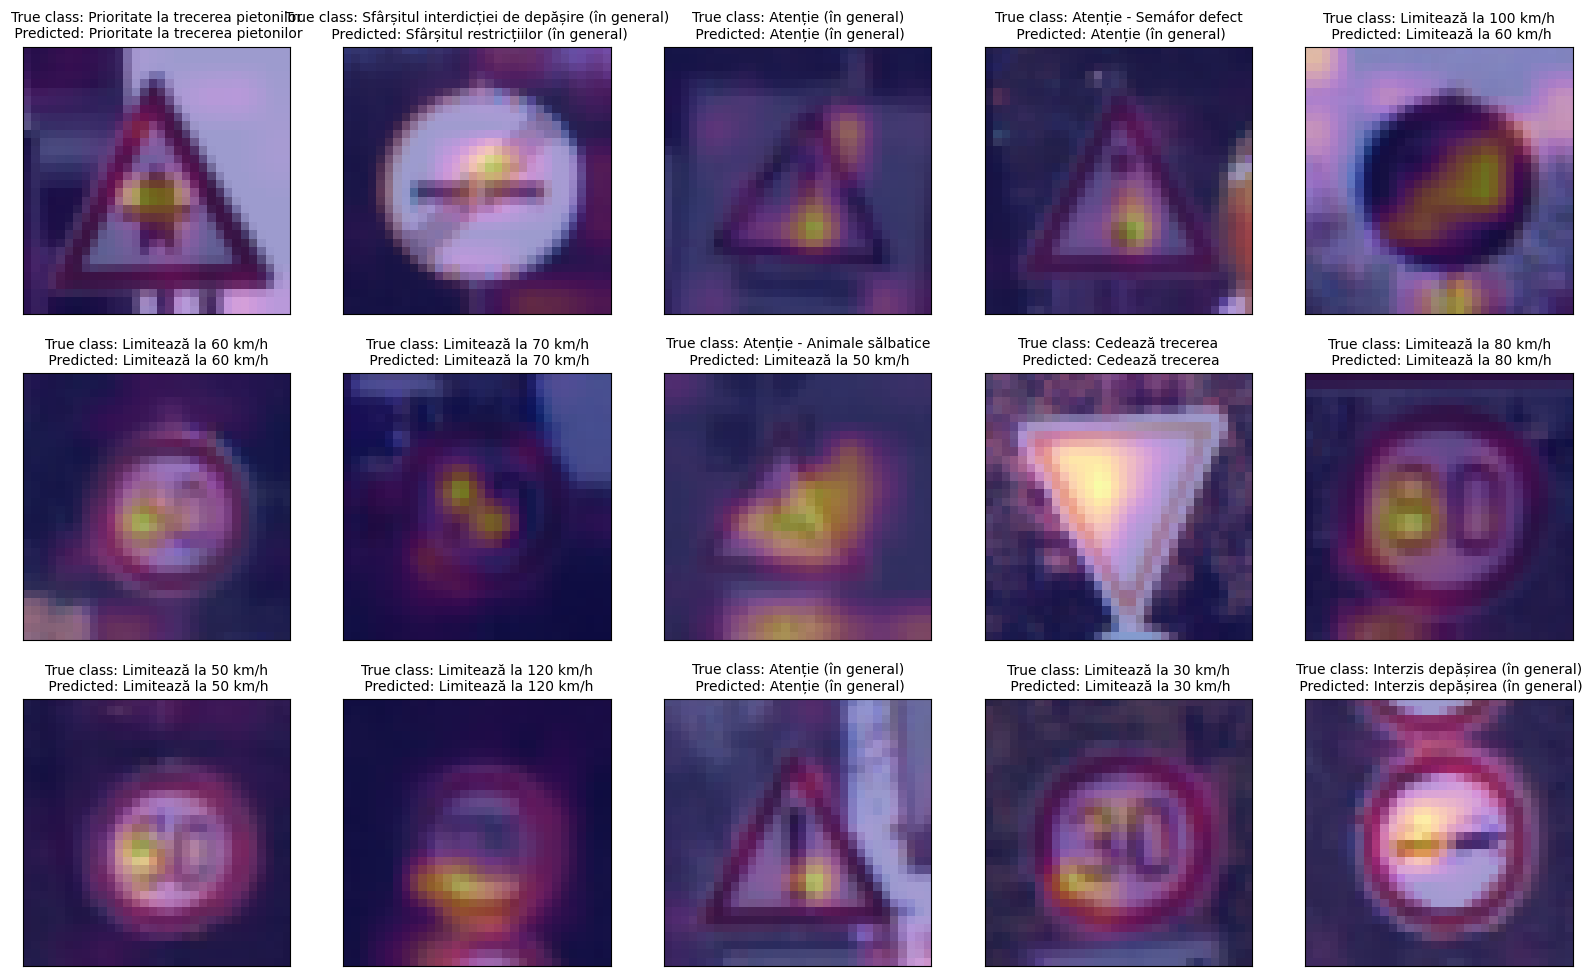

In [490]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
importlib.reload(utils)

n_rows = 3
n_cols = 5
i = 1

plt.figure(figsize=(20, n_rows * 4))

target_layers = [model.conv_sequence[-1]]
gradcam = GradCAM(model, target_layers)

for images, targets in gtsrb_test_loader:
    idx = np.random.randint(0, images.shape[0])

    image = images[idx][None, ...]
    target = targets[idx][None, ...]
    target_prep = [ClassifierOutputTarget(target)]
    
    heatmap = gradcam(input_tensor=image, targets=target_prep, aug_smooth=False)

    predicted = torch.argmax(model(image.to(device)), dim=1)[0]

    plt.subplot(n_rows, n_cols, i)
    plt.title(f"True class: {label_map[target.data.numpy()[0]]}\n Predicted: {label_map[predicted.cpu().tolist()]}", fontdict={"fontsize": 10})
    utils.plot_image_with_heatmap_overlay(image[0], heatmap[0], alpha=0.4)

    i += 1
    if i > n_rows * n_cols:
        break
plt.show()

### Transfer Learning (TL) / Fine-Tuning

**Transfer learning** is technique where a model trained on one task is adapted for a second related task. It involves the following stages:
1. Select a pre-trained model $T(\cdot)$ that was trained on a large source dataset $\mathbb{S}$, relevant to your problem (or not)
2. Remove the Final Layer(s)
3. Add Task-specific Layers - e.g. for classification, a final Linear layer with #neurons = #classes $\rightarrow$ new model $T'(\cdot)$
4. (Optional) Freeze the weights of pre-trained layers $\rightarrow$ $T'_❄️(\cdot)$
5. Train $T'_❄️(\cdot)$ for some epochs (usually, only the newly added final layer is updated) on the current desired dataset $\mathbb{D}$
6. (Optional) Fine-tune $T'_❄️(\cdot)$:
   - Unfreeze all layers $\rightarrow$ $T'_🔥(\cdot)$
   - Train $T'_🔥(\cdot)$ for a number of epochs on $\mathbb{D}$

**TL** is particularly useful when either of the following: 
- dataset $\mathbb{D}$ is limited;
- we don't have enough computational resources to train $T(\cdot)$ from scratch;
- the domains of source and target tasks are roughly similar.

We'll use the pre-trained models from `torchvision.models`, but you can try other alternatives, such as [HuggingFace](https://huggingface.co/docs/transformers/model_doc/mobilenet_v1) or [CVNets](https://github.com/apple/ml-cvnets). 

#### Step 1: load pre-trained model

In [492]:
from torchvision.models import squeezenet1_0

squeezenet = squeezenet1_0(pretrained=True)

#### Step 2: check the architecture

In [493]:
summary(squeezenet, (3, 32, 32), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 13, 13]          14,208
              ReLU-2           [-1, 96, 13, 13]               0
         MaxPool2d-3             [-1, 96, 6, 6]               0
            Conv2d-4             [-1, 16, 6, 6]           1,552
              ReLU-5             [-1, 16, 6, 6]               0
            Conv2d-6             [-1, 64, 6, 6]           1,088
              ReLU-7             [-1, 64, 6, 6]               0
            Conv2d-8             [-1, 64, 6, 6]           9,280
              ReLU-9             [-1, 64, 6, 6]               0
             Fire-10            [-1, 128, 6, 6]               0
           Conv2d-11             [-1, 16, 6, 6]           2,064
             ReLU-12             [-1, 16, 6, 6]               0
           Conv2d-13             [-1, 64, 6, 6]           1,088
             ReLU-14             [-1, 6

The final `Sequential` can be accessed by `squeezenet.classifier`. We'll modify this to fit out task.

<ins>Obs.</ins>: Other pre-trained models have different output structure. E.g., the output of `resnet18` can be accessed through `resnet18.fc`.

#### Step 3: freeze the model's parameters

In [494]:
for param in squeezenet.parameters():
    param.requires_grad = False

#### Step 4: replace the final layer with something fit for the current task, and check the new architecture

In [495]:
squeezenet.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))
  (2): ReLU(inplace=True)
  (3): AdaptiveAvgPool2d(output_size=(1, 1))
)

In [496]:
squeezenet.classifier = nn.Conv2d(512, 43, 1, 1)
squeezenet.classifier

Conv2d(512, 43, kernel_size=(1, 1), stride=(1, 1))

In [497]:
summary(squeezenet, (3, 32, 32), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 13, 13]          14,208
              ReLU-2           [-1, 96, 13, 13]               0
         MaxPool2d-3             [-1, 96, 6, 6]               0
            Conv2d-4             [-1, 16, 6, 6]           1,552
              ReLU-5             [-1, 16, 6, 6]               0
            Conv2d-6             [-1, 64, 6, 6]           1,088
              ReLU-7             [-1, 64, 6, 6]               0
            Conv2d-8             [-1, 64, 6, 6]           9,280
              ReLU-9             [-1, 64, 6, 6]               0
             Fire-10            [-1, 128, 6, 6]               0
           Conv2d-11             [-1, 16, 6, 6]           2,064
             ReLU-12             [-1, 16, 6, 6]               0
           Conv2d-13             [-1, 64, 6, 6]           1,088
             ReLU-14             [-1, 6

Check which parameters are set to learnable:

In [498]:
for name, param in squeezenet.named_parameters():
    if param.requires_grad:
        print(name, param.shape)

classifier.weight torch.Size([43, 512, 1, 1])
classifier.bias torch.Size([43])


#### Step 5: Define train config

In [503]:
batch_size = 128
epochs_freezed = 5
epochs_unfreezed = 5
lr_freezed = 1e-3
lr_unfreezed = 1e-4
print_frequency = 1

optimizer = torch.optim.Adam(squeezenet.parameters(), lr=lr_freezed)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path_tl = "models_tl/gtsrb_squeezenet"
file_name_freeze = "model_freeze.pth"
file_name_unfreeze = "model_unfreeze.pht"

#### Step 6: Pre-Train freezed model 

In [505]:
_ = torch_utils.train_loop(
    squeezenet, 
    train_loader=gtsrb_train_loader, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs_freezed, 
    test_loader=gtsrb_test_loader, 
    device=device, 
    folder_path=folder_path_tl, 
    file_name=file_name_freeze,
)

100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 12.65it/s]


Epoch 1/5: train_loss=0.0010688875670994138 train_acc=0.9996996996996997 test_loss=0.5343730802638362 test_acc=0.9290577988915281


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.10it/s]


Epoch 2/5: train_loss=0.001018870505171681 train_acc=0.9996621621621622 test_loss=0.5331814109978049 test_acc=0.930166270783848


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.61it/s]


Epoch 3/5: train_loss=0.0008845012778129224 train_acc=0.9998873873873874 test_loss=0.5548732641218889 test_acc=0.927870150435471


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.10it/s]


Epoch 4/5: train_loss=0.0009219968219647192 train_acc=0.9996996996996997 test_loss=0.56661492766756 test_acc=0.9274742676167854


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:06<00:00, 14.51it/s]


Epoch 5/5: train_loss=0.000796539458156783 train_acc=0.9998498498498498 test_loss=0.5640004113918603 test_acc=0.9287410926365796


#### Step 6: Unfreeze and Fine-tune

In [506]:
squeezenet.load_state_dict(
    torch.load(
        os.path.join(folder_path_tl, file_name_freeze)
    )["state_dict"]
)
_ = squeezenet.to(device)

In [507]:
for param in squeezenet.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(squeezenet.parameters(), lr=lr_unfreezed)

In [508]:
_ = torch_utils.train_loop(
    squeezenet, 
    train_loader=gtsrb_train_loader, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs_unfreezed, 
    test_loader=gtsrb_test_loader, 
    device=device, 
    folder_path=folder_path_tl, 
    file_name=file_name_unfreeze,
)

Couldn't load model


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:06<00:00, 14.16it/s]


Epoch 1/5: train_loss=0.005233795569624812 train_acc=0.9983108108108109 test_loss=0.6393111122376991 test_acc=0.9273950910530483


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.04it/s]


Epoch 2/5: train_loss=0.0025406849097391166 train_acc=0.9992867867867868 test_loss=0.574565704272251 test_acc=0.930166270783848


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.31it/s]


Epoch 3/5: train_loss=0.0005317775401458698 train_acc=0.9999249249249249 test_loss=0.5783287803030978 test_acc=0.935471100554236


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 12.73it/s]


Epoch 4/5: train_loss=0.004154032720680823 train_acc=0.9987237237237238 test_loss=0.6894419262505541 test_acc=0.9239904988123515


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 12.74it/s]

Epoch 5/5: train_loss=0.004987718647172866 train_acc=0.9986486486486487 test_loss=0.6189903997712665 test_acc=0.9253365003958828


#### Compare results with previous model

In [509]:
import torch_utils
importlib.reload(torch_utils)

# load best model
squeezenet.load_state_dict(
    torch.load(
        os.path.join(folder_path_tl, file_name_unfreeze)
    )["state_dict"]
)

# get test predictions
y_train, y_train_pred = torch_utils.get_prediction_targets(squeezenet, gtsrb_train_loader, device=device)
y_test, y_test_pred = torch_utils.get_prediction_targets(squeezenet, gtsrb_test_loader, device=device)

100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.50it/s]


In [510]:
test_cm_squeeze = confusion_matrix(y_test, y_test_pred, normalize="true")

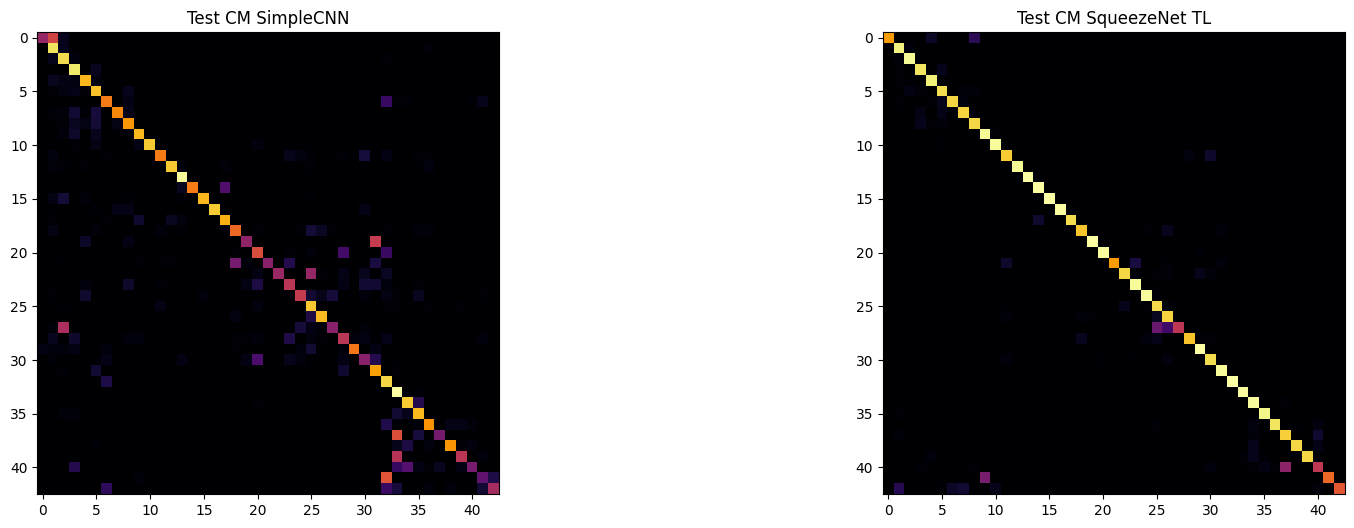

In [511]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.title("Test CM SimpleCNN")
plt.imshow(test_cm, cmap="inferno")
plt.subplot(1, 2, 2)
plt.title("Test CM SqueezeNet TL")
_ = plt.imshow(test_cm_squeeze, cmap="inferno")

In [53]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Implement the function "compute_metrics_from_cm" which receives as input a confusion metrics and returns the per-class accuracies and precisions
def compute_metrics_from_cm(conf_matrix):
    per_class_acc = np.diag(conf_matrix)
    per_class_prec = np.diag(conf_matrix) / conf_matrix.sum(axis=0)

    return per_class_acc, per_class_prec
# *************************************************** 

In [519]:
acc_simple, prec_simple = compute_metrics_from_cm(test_cm)
acc_squeeze, prec_squeeze = compute_metrics_from_cm(test_cm_squeeze)

In [541]:
import pandas as pd

df = pd.DataFrame({
    "Class": label_map.values(),
    "Simple CNN Accuracy": acc_simple,
    "Simple CNN Precision": prec_simple,
    "SqueezeNet Accuracy": acc_squeeze,
    "SqueezeNet Precision": prec_squeeze
})

df_overall  = pd.DataFrame({"Class": ["Overall Performance"],
                            "Simple CNN Accuracy": [np.mean(acc_simple)],
                            "Simple CNN Precision": [np.mean(prec_simple)],
                            "SqueezeNet Accuracy": [np.mean(acc_squeeze)],
                            "SqueezeNet Precision": [np.mean(prec_squeeze)]
                           })

line = [':------------------------']
df = pd.concat([df, 
                pd.DataFrame({
                    'Class': line,
                    "Simple CNN Accuracy": line,
                    "Simple CNN Precision": line,
                    "SqueezeNet Accuracy": line,
                    "SqueezeNet Precision": line
                }),
                df_overall], 
               ignore_index=True)

df_markdown = df.to_markdown(index=False)

In [542]:
print(df_markdown)

| Class                                            | Simple CNN Accuracy       | Simple CNN Precision      | SqueezeNet Accuracy       | SqueezeNet Precision      |
|:-------------------------------------------------|:--------------------------|:--------------------------|:--------------------------|:--------------------------|
| Limitează la 20 km/h                             | 0.4                       | 0.9023070350327542        | 0.7833333333333333        | 0.9982300884955753        |
| Limitează la 30 km/h                             | 0.9083333333333333        | 0.4946092663327649        | 0.9638888888888889        | 0.8018575090939529        |
| Limitează la 50 km/h                             | 0.896                     | 0.5117534971433779        | 0.9813333333333333        | 0.9283925201812515        |
| Limitează la 60 km/h                             | 0.9244444444444444        | 0.6041030999908404        | 0.9333333333333333        | 0.8870038960172436        |
| Limiteaz

#### Save the entire model for next Lab ...

In [552]:
torch.save(squeezenet, os.path.join(folder_path_tl, "full_finetuned_mode.pht"))

#### <ins>Exercise</ins>: play around with different models from `torchvision.models`, compare their performances, and save them for future use. Construct a function to fine-tune a pre-trained model, given the above steps.

## **Music Genre Classification** <a class="anchor" id="other_cnn"></a>

### GTZAN dataset

The [GTZAN](https://paperswithcode.com/dataset/gtzan) dataset is a widely used collection of audio clips for music genre classification research. It consists of 1,000 audio tracks, each 30 seconds in duration, spanning across 10 different music genres (blues, classical, country, disco, hip-hop, jazz, metal, pop, reggae, and rock). 

#### Download and Extract dataset

In [1]:
gtzan_url = "https://huggingface.co/datasets/marsyas/gtzan/resolve/main/data/genres.tar.gz?download=true"

In [2]:
import tarfile
import os
from urllib import request

if not os.path.exists(os.path.join("./data", "gtzan.tar.gz")):
    request.urlretrieve(gtzan_url, os.path.join("./data", "gtzan.tar.gz"))

In [3]:
if not os.path.exists(os.path.join("data", "gtzan")):
    with tarfile.open(os.path.join("data", "gtzan.tar.gz"), "r:gz") as tar:
        tar.extractall(os.path.join("data", "gtzan"))

#### Create a Dataset

In [4]:
from torch.utils.data import Dataset
import librosa
import numpy as np

class GTZANdataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.classes = sorted(
            [x for x in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, x))]
        )
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        self.samples = self._make_file_list()
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        file_path, label = self.samples[idx]
        waveform, sample_rate = librosa.load(file_path)
        
        if self.transform:
            waveform = self.transform(waveform)

        return waveform, label

    def _make_file_list(self):
        file_list = []
        for class_name in self.classes:
            class_dir = os.path.join(self.root_dir, class_name)
            for file_name in os.listdir(class_dir):
                if not file_name.startswith('._'):
                    file_path = os.path.join(class_dir, file_name)
                    ### Keep only those files that can bee read
                    try: 
                        _ = librosa.load(file_path)
                        file_list.append((file_path, self.class_to_idx[class_name]))
                    except:
                        print(f"Couldn't load {file_path}. Keeping it out.")
        return file_list

In [5]:
gtzan_dataset = GTZANdataset("data/gtzan/genres")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2276\3159508267.py:36: UserWarning: PySoundFile failed. Trying audioread instead.
  _ = librosa.load(file_path)
C:\Users\lenovo\.virtualenvs\abba-torch\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Couldn't load data/gtzan/genres\jazz\jazz.00054.wav. Keeping it out.


In [6]:
gtzan_dataset.class_to_idx

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

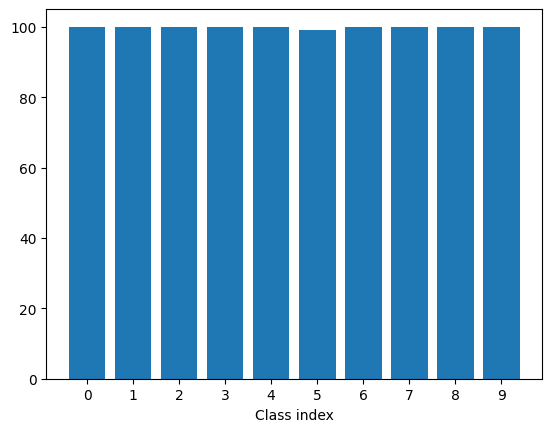

In [7]:
import matplotlib.pyplot as plt

label_counts = [0] * 10
for x, y in gtzan_dataset.samples:
    label_counts[y] += 1

plt.bar(list(range(10)), label_counts)
plt.xticks(list(range(10)))
plt.xlabel("Class index")
plt.show()

In [69]:
idx_to_class_gtzan = {v: k for k, v in gtzan_dataset.class_to_idx.items()}

#### Display some samples

In [9]:
from IPython.display import Audio, display, HTML

def display_plot(i, dset):
    x, y = dset[i]
    if not isinstance(x, np.ndarray):
        x = x.data.numpy()[0]
        y = int(y.data.numpy())

    plt.figure(figsize=(15, 4))
    librosa.display.waveshow(x, sr=22050)

    audio_html = Audio(data=x, rate=22050)._repr_html_()
    
    centered_html = f"""
    <br>
    <div style="display: flex; justify-content: center;">
        Label: {idx_to_class_gtzan[y]} ({y})
    </div>
    <div style="display: flex; justify-content: center;">
        {audio_html}
    </div>
    """
    display(HTML(centered_html))

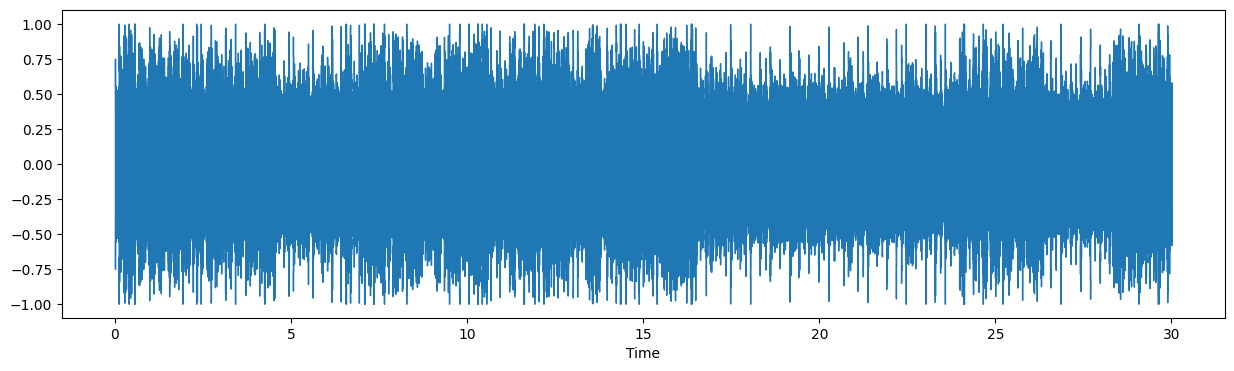

In [234]:
i = np.random.randint(0, len(gtzan_dataset))
display_plot(i, gtzan_dataset)

#### Split tracks into Train/Test and create Segmented Datasets

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

def split_indices(samples, test_size=0.2, random_state=42):
    # Extract labels and convert them to numpy array
    labels = np.array([sample[1] for sample in samples])

    # Initialize StratifiedShuffleSplit with desired test size and random state
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)

    # Get the train and test indices
    train_idx, test_idx = next(splitter.split(samples, labels))

    return train_idx, test_idx

In [12]:
train_idx, test_idx = split_indices(gtzan_dataset.samples, test_size=0.2, random_state=42)
len(train_idx), len(test_idx)

(799, 200)

**All segments extracted from the same song should either be in train or test!**

#### <ins>Exercise</ins>: implement the _segment_tracks() member function of SegmentedGTZANdataset to divide each track into corresponding segments

In [16]:
import torch

class SegmentedGTZANdataset(Dataset):
    def __init__(self, original_dataset, indices, segment_length, overlap):
        self.original_dataset = original_dataset
        self.indices = indices
        self.segment_length = segment_length
        self.overlap = overlap

        # Create segmented dataset
        self.segmented_data = self._segment_tracks()

    def __len__(self):
        return len(self.segmented_data)

    def __getitem__(self, idx):
        return self.segmented_data[idx]

    def _segment_tracks(self):
        segmented_data = []
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: write a function to compute per-class accuracy and precision
        window = np.hamming(self.segment_length)
        
        for idx in self.indices:
            # Load audio track
            audio_data, label = self.original_dataset[idx]

            # Calculate overlap length
            overlap_length = int(self.segment_length * self.overlap)

            # Get segment start indices
            start_indices = list(range(0, len(audio_data) - self.segment_length + 1, self.segment_length - overlap_length // 2))

            # Segment audio track
            for start_idx in start_indices:
                end_idx = start_idx + self.segment_length
                segment = audio_data[start_idx: end_idx]

                # Apply Hamming window to the segment
                segment = segment * window

                # Add segment and label to segmented data
                segmented_data.append((
                    torch.FloatTensor(segment)[None, ...], torch.LongTensor([label]).squeeze()
                ))
            
        # ***************************************************
        return segmented_data

In [25]:
sr = 22050
segment_length = 5 * sr
overlap = 0.5 # fraction

gtzan_train_segm = SegmentedGTZANdataset(gtzan_dataset, train_idx, segment_length, overlap)
gtzan_test_segm = SegmentedGTZANdataset(gtzan_dataset, test_idx, segment_length, overlap)

In [26]:
len(gtzan_train_segm), len(gtzan_test_segm)

(5593, 1400)

In [27]:
sig, label = gtzan_train_segm[100]
sig.shape, label

(torch.Size([1, 110250]), tensor(7))

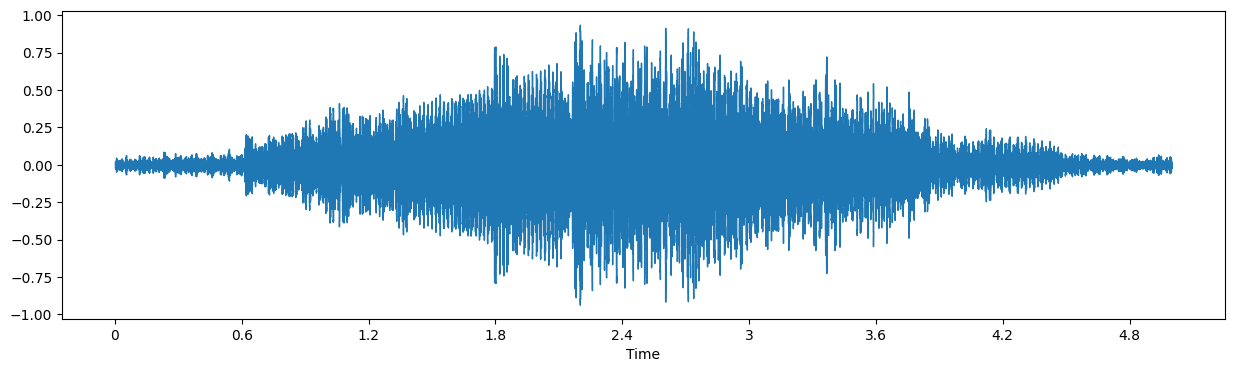

In [89]:
i = np.random.randint(0, len(gtzan_test_segm))
display_plot(i, gtzan_test_segm)

### $1^{st}$ Method: Raw Signal classification using 1D convolutions

In [209]:
import torch.nn as nn

class GlobalMaxPooling1D(nn.Module):
    """Custom class implementing 1D version of Adaptive maxpool 2D"""
    def __init__(self, data_format='channels_last'):
        super(GlobalMaxPooling1D, self).__init__()
    
    def forward(self, input):
        return torch.max(input, axis=-1).values

class Conv1Dnetwork(nn.Module):
    def __init__(self, in_ch, n_classes):
        super(Conv1Dnetwork, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv1d(in_ch, 32, kernel_size=9),
            nn.Tanh(),
            nn.MaxPool1d(kernel_size=16, stride=16),
            nn.Conv1d(32, 64, kernel_size=7),
            nn.Tanh(),
            nn.MaxPool1d(kernel_size=8, stride=8),
            nn.Conv1d(64, 128, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool1d(kernel_size=4, stride=4),
            nn.Conv1d(128, 128, kernel_size=3),
            nn.Tanh(),
        )

        self.global_pool = GlobalMaxPooling1D()
        
        self.dense = nn.Sequential(
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        z1 = self.conv(x)
        z2 = self.global_pool(z1)
        z3 = self.dense(z2)

        return z3

In [210]:
from torchsummary import summary

raw_model = Conv1Dnetwork(1, 10)

summary(raw_model, (1, 5 * sr), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1           [-1, 32, 110242]             320
              Tanh-2           [-1, 32, 110242]               0
         MaxPool1d-3             [-1, 32, 6890]               0
            Conv1d-4             [-1, 64, 6884]          14,400
              Tanh-5             [-1, 64, 6884]               0
         MaxPool1d-6              [-1, 64, 860]               0
            Conv1d-7             [-1, 128, 856]          41,088
              Tanh-8             [-1, 128, 856]               0
         MaxPool1d-9             [-1, 128, 214]               0
           Conv1d-10             [-1, 128, 212]          49,280
             Tanh-11             [-1, 128, 212]               0
GlobalMaxPooling1D-12                  [-1, 128]               0
           Linear-13                   [-1, 10]           1,290
Total params: 106,378
Trainable params

In [211]:
import torch_utils
from torch.utils.data import DataLoader

batch_size = 32
lr = 1e-3
print_frequency = 1
epochs = 10

gtzan_train_segm_dl = DataLoader(gtzan_train_segm, batch_size=batch_size, shuffle=True)
gtzan_test_segm_dl = DataLoader(gtzan_test_segm, batch_size=batch_size, shuffle=False)

optimizer = torch.optim.Adam(raw_model.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path = "models/gtzan_raw"
file_name = "model.pth"

_ = torch_utils.train_loop(
    raw_model, 
    train_loader=gtzan_train_segm_dl, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs, 
    test_loader=gtzan_test_segm_dl, 
    device="cuda", 
    folder_path=folder_path, 
    file_name=file_name,
)

Couldn't load model


100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 14.81it/s]


Epoch 1/10: train_loss=1.413812335899898 train_acc=0.5072411943500804 test_loss=1.240316970104521 test_acc=0.5614285714285714


100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 15.34it/s]


Epoch 2/10: train_loss=1.028113124711173 train_acc=0.6431253352404792 test_loss=1.20819565044208 test_acc=0.605


100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 15.68it/s]


Epoch 3/10: train_loss=0.8311373889446259 train_acc=0.7235830502413731 test_loss=1.0181562196124683 test_acc=0.6535714285714286


100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 15.05it/s]


Epoch 4/10: train_loss=0.6791570452281407 train_acc=0.7752547827641695 test_loss=0.9714676642959769 test_acc=0.6628571428571428


100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 15.03it/s]


Epoch 5/10: train_loss=0.570237342289516 train_acc=0.8153048453423922 test_loss=0.9567712020467628 test_acc=0.6692857142857143


100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 15.02it/s]


Epoch 6/10: train_loss=0.47478666484355925 train_acc=0.8530305739317003 test_loss=0.9196653284809806 test_acc=0.6828571428571428


100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 14.83it/s]


Epoch 7/10: train_loss=0.39419169868741716 train_acc=0.8837833005542642 test_loss=0.852861704135483 test_acc=0.7157142857142857


100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:03<00:00, 14.64it/s]


Epoch 8/10: train_loss=0.3116787896837507 train_acc=0.918648310387985 test_loss=0.8275739845227111 test_acc=0.7278571428571429


100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 14.95it/s]


Epoch 9/10: train_loss=0.2509737955246653 train_acc=0.9395673162882174 test_loss=0.8643071529540148 test_acc=0.7128571428571429


100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 14.92it/s]

Epoch 10/10: train_loss=0.2149529777254377 train_acc=0.9506526014661184 test_loss=0.8415408693253994 test_acc=0.7228571428571429


In [212]:
from sklearn.metrics import confusion_matrix

y_test, y_test_pred = torch_utils.get_prediction_targets(raw_model, gtzan_test_segm_dl, device="cuda")

test_cm_raw = confusion_matrix(y_test, y_test_pred, normalize="true")

raw_metrics_gtzan = compute_metrics_from_cm(test_cm_raw)

100%|███████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 17.15it/s]


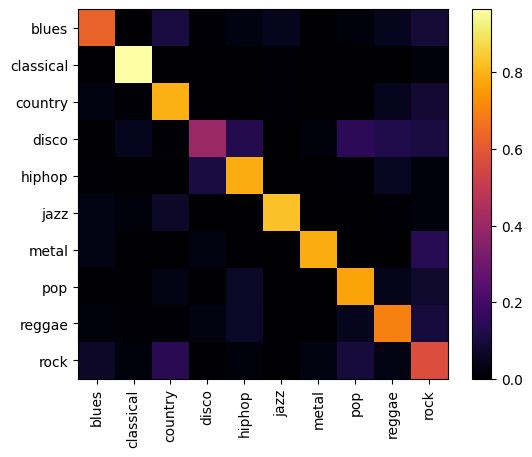

In [213]:
plt.imshow(test_cm_raw, cmap="inferno")
plt.xticks(ticks=list(range(10)), labels=[idx_to_class_gtzan[i] for i in range(10)], rotation='vertical')
plt.yticks(ticks=list(range(10)), labels=[idx_to_class_gtzan[i] for i in range(10)])
plt.colorbar()

#### Visualize the frequency response of first layers' filters

In [214]:
filters = raw_model.conv[0].weight.detach().squeeze().cpu().numpy()
filters.shape

(32, 9)

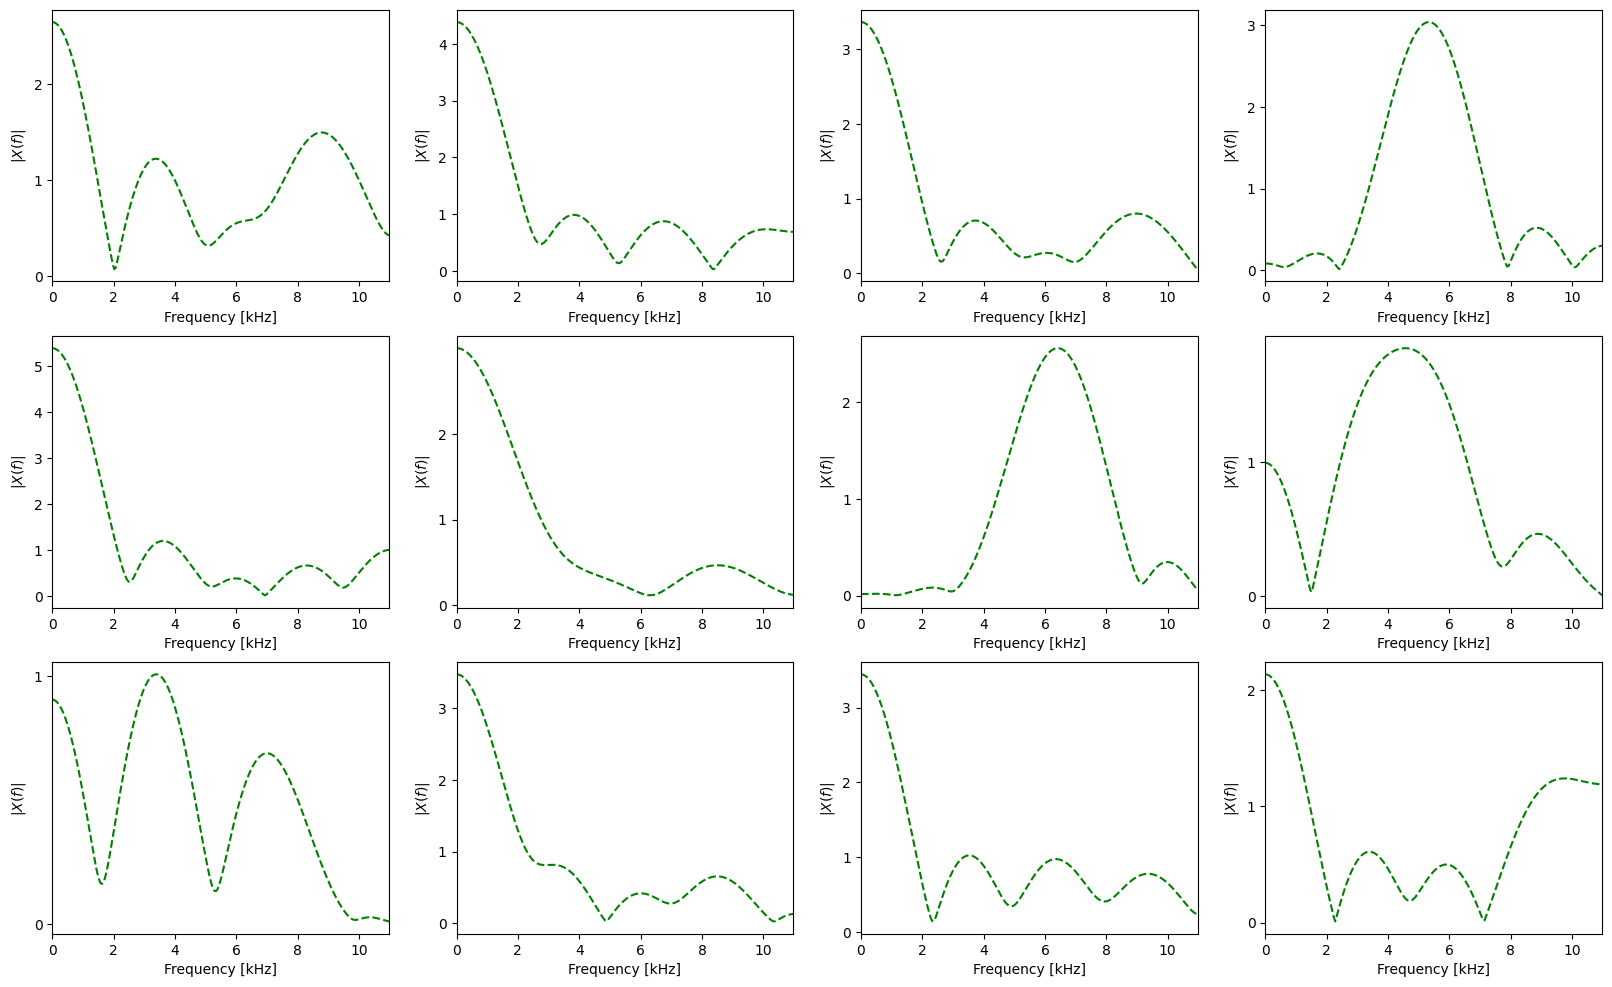

In [233]:
from scipy.signal import freqz

n_rows, n_cols = 3, 4

freq_responses = []

plt.figure(figsize=(20, n_rows * 4))
for i in range(min(n_rows * n_cols, filters.shape[0])):
    plt.subplot(n_rows, n_cols, i+1)
    
    w, h = freqz(filters[i], worN=256, fs=sr)
    w = w / 1000
    
    freq_responses.append(np.abs(h))

    plt.plot(w, np.abs(h), "g--")
    plt.xlabel("Frequency [kHz]")
    plt.ylabel("$|X(f)|$")
    plt.yticks(ticks=list(range(int(np.max(freq_responses[i])) + 1)))
    plt.xlim([0, np.max(w)])

<br>

**However**, we need to classify the 30s songs from the original test data, using the `raw_model`. How?

#### <ins>Exercise</ins>: Construct a function that will receive a test song from `gtzan_dataset` (given the already defined `test_idx`) and return the predicted class as a *majority vote* over all its segments.

- Since our `raw_model` can be used on arbitrarily long sequences, you can try predicting on various segment lentghs (even the entire signal)
- You also need to implement a function that will return the segments for a given signal (check out the `_segment_tracks` member function from `SegmentedGTZANdataset`)

In [129]:
# ***************************************************
# INSERT YOUR CODE HERE

# ***************************************************

### $2^{nd}$ Method: Mel-Spectrogram with 1D/2D convolutions

![Mel-S](imgs/1d_v_2d.png)

#### Implement MelGTZANdataset class, which: 

- Receives a SegmentedGTZANdataset instance, and other mel-related parameters
- Returns samples in the form of (mel spectrogram, label)
- Implements a member function `plot_sample` which receives an integer `i` as argument and plots the mel spectrogram of the $i^{th}$ sample

See [lirbosa.feature.melspectrogram](https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html), [librosa.display.specshow](https://librosa.org/doc/main/auto_examples/plot_display.html).

In [347]:
from torch.utils.data import Dataset
import librosa
from tqdm import tqdm

class MelGTZANdataset(Dataset):
    def __init__(self, segmented_dataset, sr, n_fft, hop_length, n_mels, window="hamming"):
        super(MelGTZANdataset, self).__init__()

        self.dataset = segmented_dataset

        self.mel_spec_func = lambda x: librosa.feature.melspectrogram(y=x, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, window=window)

        self.mel_samples = self._make_mels()

        self.class_to_idx = segmented_dataset.original_dataset.class_to_idx
        self.idx_to_class = {v: k for k, v in self.class_to_idx.items()}
    
    def __len__(self):
        return len(self.dataset)

    def standardize(self, mel_spec):
        return (mel_spec - torch.mean(mel_spec)) / torch.std(mel_spec)
    
    def __getitem__(self, i):
        """The mel spectrogram should be normalized first"""
        mel, label = self.mel_samples[i]
        
        return self.standardize(mel), label

    def _make_mels(self):
        specs = []

        for sig, label in tqdm(self.dataset.segmented_data):
            sig = sig.squeeze()

            mel = self.mel_spec_func(sig.numpy())
            mel = librosa.power_to_db(mel)
            mel = torch.FloatTensor(mel)
            # keep it unnormalized for plotting; normalize when __getitem__ is called

            specs.append((mel, label))

        return specs

    def plot_sample(self, i):
        M_db, label = self.mel_samples[i]

        fig, ax = plt.subplots()
        img = librosa.display.specshow(M_db.data.numpy(), y_axis='mel', x_axis='time', ax=ax)
        ax.set(title=f'Label: {self.idx_to_class[int(label.data.numpy())]}')
        fig.colorbar(img, ax=ax, format="%+2.f dB")

In [348]:
n_mels = 128
hop_length = 512
n_fft = 2048

mel_train_gtzan = MelGTZANdataset(gtzan_train_segm, sr, n_fft=2048, hop_length=512, n_mels=128)
mel_test_gtzan = MelGTZANdataset(gtzan_test_segm, sr, n_fft=2048, hop_length=512, n_mels=128)

100%|███████████████████████████████████████████████████████████████████████| 1400/1400 [00:20<00:00, 67.18it/s]


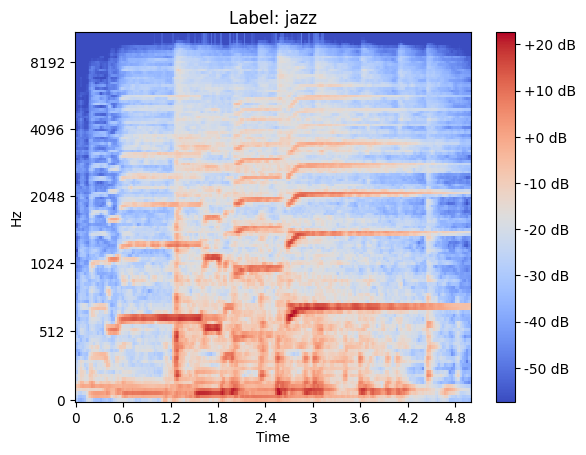

In [351]:
mel_test_gtzan.plot_sample(68)

In [363]:
spec, _ = mel_test_gtzan[0]
print("Shape of one sample: ", spec.shape)
n_windows = spec.shape[1]

Shape of one sample:  torch.Size([128, 216])


#### Implement 1D/2D CNN 

In [451]:
class SpectroCNN(nn.Module):
    def __init__(self, n_mels, n_classes, mode='2D'):
        super(SpectroCNN, self).__init__()

        if mode == '2D':
            # ***************************************************
            # INSERT YOUR CODE HERE
            # TODO: define your 2D convolutional architecture for classification 
            self.conv = nn.Sequential(
                ...
            )

            self.global_pool = ...
            
            self.dense = nn.Sequential(
                ...
            )
            # ***************************************************
        elif mode == '1D':
            self.conv = nn.Sequential(
                nn.Conv1d(in_channels=n_mels, out_channels=128, kernel_size=3, stride=1),
                nn.ReLU(),
                nn.Dropout(p=0.4),
                nn.MaxPool1d(kernel_size=2, stride=2),
                nn.Conv1d(in_channels=128, out_channels=128, kernel_size=3, stride=1),
                nn.ReLU(),
                nn.Dropout(p=0.4),
                nn.MaxPool1d(kernel_size=2, stride=2),
                nn.Conv1d(in_channels=128, out_channels=128, kernel_size=2, stride=1),
                nn.ReLU(),
                nn.Dropout(p=0.3),
                nn.MaxPool1d(kernel_size=2, stride=2),
                nn.Conv1d(in_channels=128, out_channels=64, kernel_size=2, stride=1),
                nn.ReLU(),
                nn.Dropout(p=0.3),
                nn.MaxPool1d(kernel_size=2, stride=2),
                nn.Conv1d(in_channels=64, out_channels=64, kernel_size=2, stride=1),
                nn.ReLU(),
                nn.Dropout(p=0.3)
            )
            
            self.global_pool = GlobalMaxPooling1D()
            
            self.dense = nn.Sequential(
                nn.Linear(64, n_classes)
            )
        else:
            ValueError(f"Unsupported mode {mode}.")
    
    def forward(self, x):
        z1 = self.conv(x)
        z2 = self.global_pool(z1)
        z3 = self.dense(z2)

        return z3

In [452]:
mel_cnn_1d = SpectroCNN(n_mels, 10, mode='1D')

summary(mel_cnn_1d, (n_mels, n_windows), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 128, 214]          49,280
              ReLU-2             [-1, 128, 214]               0
           Dropout-3             [-1, 128, 214]               0
         MaxPool1d-4             [-1, 128, 107]               0
            Conv1d-5             [-1, 128, 105]          49,280
              ReLU-6             [-1, 128, 105]               0
           Dropout-7             [-1, 128, 105]               0
         MaxPool1d-8              [-1, 128, 52]               0
            Conv1d-9              [-1, 128, 51]          32,896
             ReLU-10              [-1, 128, 51]               0
          Dropout-11              [-1, 128, 51]               0
        MaxPool1d-12              [-1, 128, 25]               0
           Conv1d-13               [-1, 64, 24]          16,448
             ReLU-14               [-1,

In [454]:
batch_size = 128
lr = 1e-3
print_frequency = 1
epochs = 20

mel_train_gtzan_dl = DataLoader(mel_train_gtzan, batch_size=batch_size, shuffle=True)
mel_test_gtzan_dl = DataLoader(mel_test_gtzan, batch_size=batch_size, shuffle=False)

optimizer = torch.optim.Adam(mel_cnn_1d.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path = "models/gtzan_mel_1d"
file_name = "model.pth"

_ = torch_utils.train_loop(
    mel_cnn_1d, 
    train_loader=mel_train_gtzan_dl, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs, 
    test_loader=mel_test_gtzan_dl, 
    device="cuda", 
    folder_path=folder_path, 
    file_name=file_name,
)

100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.43it/s]


Epoch 1/20: train_loss=0.45728117701682175 train_acc=0.8508850348650099 test_loss=1.1129256595264783 test_acc=0.6571428571428571


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.73it/s]


Epoch 2/20: train_loss=0.24384620955044572 train_acc=0.9122116931879135 test_loss=1.091706552288749 test_acc=0.6507142857142857


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.87it/s]


Epoch 3/20: train_loss=0.1995506345887076 train_acc=0.9331306990881459 test_loss=1.0061074549501592 test_acc=0.6907142857142857


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.77it/s]


Epoch 4/20: train_loss=0.21654639139094137 train_acc=0.9202574646880028 test_loss=1.0008734356273303 test_acc=0.69


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 13.86it/s]


Epoch 5/20: train_loss=0.2159693410450762 train_acc=0.9193634900768818 test_loss=1.034481872211803 test_acc=0.6857142857142857


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.17it/s]


Epoch 6/20: train_loss=0.1892211169681766 train_acc=0.9286608260325406 test_loss=0.9898858828978105 test_acc=0.6957142857142857


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 16.06it/s]


Epoch 7/20: train_loss=0.16841149093075233 train_acc=0.9395673162882174 test_loss=1.0195811282504688 test_acc=0.665


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.13it/s]


Epoch 8/20: train_loss=0.16732701320539822 train_acc=0.9402824959771142 test_loss=0.9990253936160695 test_acc=0.6785714285714286


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.42it/s]


Epoch 9/20: train_loss=0.2002108037810434 train_acc=0.9284820311103165 test_loss=1.020648257298903 test_acc=0.6621428571428571


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.17it/s]


Epoch 10/20: train_loss=0.18251986970955675 train_acc=0.9309851600214554 test_loss=1.0180534449490635 test_acc=0.67


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 14.49it/s]


Epoch 11/20: train_loss=0.16285184787755663 train_acc=0.9422492401215805 test_loss=0.9539711800488558 test_acc=0.7021428571428572


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.35it/s]


Epoch 12/20: train_loss=0.10512776351110502 train_acc=0.9624530663329162 test_loss=0.986218436197801 test_acc=0.685


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.38it/s]


Epoch 13/20: train_loss=0.14883264679123054 train_acc=0.9465403182549615 test_loss=0.9727309888059442 test_acc=0.6864285714285714


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.24it/s]


Epoch 14/20: train_loss=0.100742465054447 train_acc=0.9635258358662614 test_loss=0.9539107788692821 test_acc=0.6957142857142857


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.52it/s]


Epoch 15/20: train_loss=0.11739704038270495 train_acc=0.9583407831217593 test_loss=0.99850379336964 test_acc=0.66


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.42it/s]


Epoch 16/20: train_loss=0.13590264345773242 train_acc=0.9510101913105667 test_loss=1.003532816063274 test_acc=0.6835714285714286


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.54it/s]


Epoch 17/20: train_loss=0.10883134552700953 train_acc=0.9610227069551225 test_loss=0.9497177004814148 test_acc=0.6757142857142857


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 14.57it/s]


Epoch 18/20: train_loss=0.10724827122281898 train_acc=0.9633470409440372 test_loss=1.0130061236294834 test_acc=0.6692857142857143


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.53it/s]


Epoch 19/20: train_loss=0.11230829057537696 train_acc=0.9588771678884319 test_loss=0.9705838506872003 test_acc=0.6814285714285714


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 14.67it/s]

Epoch 20/20: train_loss=0.10479561527344314 train_acc=0.9635258358662614 test_loss=1.0062945268370889 test_acc=0.6735714285714286


#### Train and compare the 2D CNN for mel spectrogram

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: instantiate 2D model, define training parameters, train

# ***************************************************

### $3^{rd}$ Method (<ins>Homework</ins>): Raw Signal + Mel-Spectrogram, network with 2 inputs

You can check: [Multi-input Network Pytorch](https://github.com/zaidalyafeai/Machine-Learning/blob/master/Multi-input%20Network%20Pytorch.ipynb), [Multi-input models](https://campus.datacamp.com/courses/intermediate-deep-learning-with-pytorch/multi-input-multi-output-architectures?ex=1)

You will need:
- A new Dataset class that returns two input variables + a label
- A `nn.Module` CNN class that can receive and process two different inputs: you can use as sub-modules the previously implemented networks for raw signal and spectrogram processing
- (Optional) a new training loop, OR write the new CNN class such that the same `torch_utils.train_loop` can be used (think of how `inputs` variable can be passed to the CNN class)

Compare the performance of this method with the previous two (single-input cases).